In [1]:
import pandas as pd
from sqlalchemy import create_engine
from pathlib import Path

In [2]:
patient_df = pd.read_parquet("../data/patients.parquet")

In [13]:
noteevent_df = pd.read_parquet("../data/noteevents.parquet")
noteevent_df['chartdate'] = pd.to_datetime(noteevent_df['chartdate'])
noteevent_df['text_len'] = noteevent_df['text'].str.len()

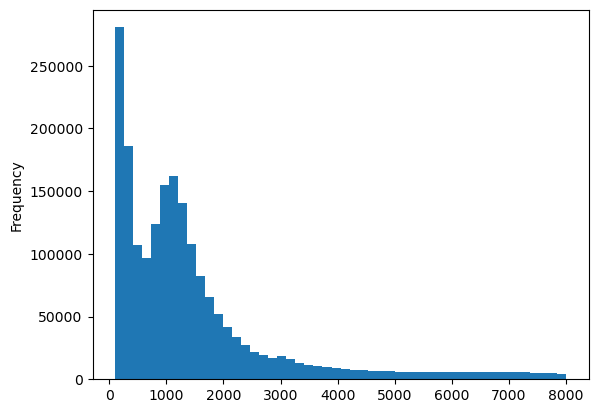

In [6]:
noteevent_df['text_len'][(noteevent_df['text_len'] > 100) & (noteevent_df['text_len'] < 8000)]\
    .plot.hist(bins=50);

In [7]:
counts = noteevent_df.groupby(['subject_id'])['subject_id'].count()

In [8]:
print(len(counts[counts > 0]))
print(len(counts[counts > 1]))
print(len(counts[counts > 10]))
print(len(counts[counts > 100]))

46146
45979
34310
4787


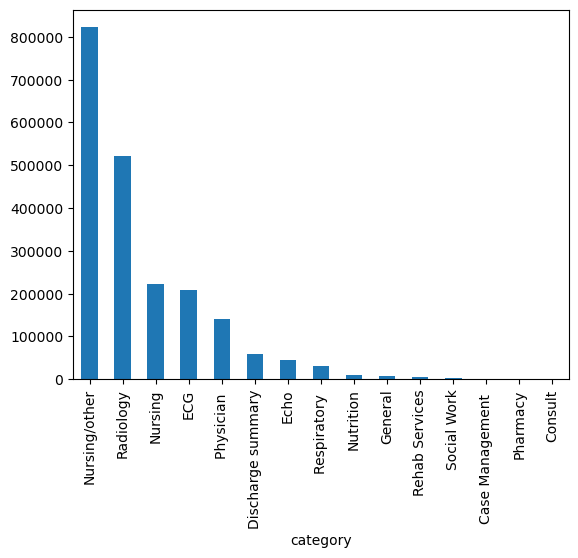

In [9]:
noteevent_df.groupby(['category'])['category'].count().sort_values(ascending=False).plot.bar();